In [1]:
# Discretization

import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [13]:
data = pd.read_csv('/Users/mattmastin/Desktop/titanic.csv',
                  usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [14]:
X_train, X_test, y_train, y_test = train_test_split(data[['age', 'fare']],
                                                   data['survived'],
                                                   test_size=0.3,
                                                   random_state=0)

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [6]:
def impute_na(data, variable):
    df = data.copy()
    df[variable +'_random'] = df[variable]
    
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)
    
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable + '_random']

In [8]:
X_train['age'] = impute_na(data, 'age')
X_test['age'] = impute_na(data, 'age')

X_train['fare'] = impute_na(data, 'fare')
X_test['fare'] = impute_na(data, 'fare')

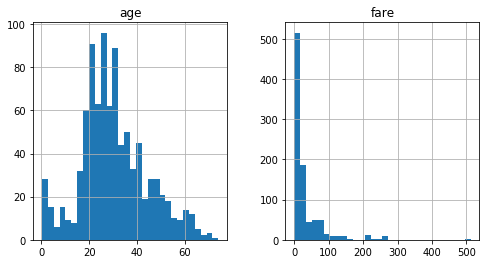

In [9]:
X_train[['age', 'fare']].hist(bins=30, figsize=(8,4))
plt.show()

In [11]:
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [15]:
X_train.shape, X_test.shape

((916, 2), (393, 2))

In [16]:
X_train['age'] = impute_na(data, 'age')
X_test['age'] = impute_na(data, 'age')

X_train['fare'] = impute_na(data, 'fare')
X_test['fare'] = impute_na(data, 'fare')

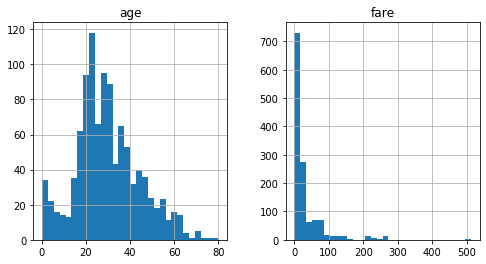

In [17]:
data[['age', 'fare']].hist(bins=30, figsize=(8,4))
plt.show()

In [18]:
age_range = X_train['age'].max() - X_train['age'].min()
age_range

73.8333

In [20]:
age_range / 10

7.383329999999999

In [21]:
min_value = int(np.floor(X_train['age'].min()))
max_value = int(np.ceil(X_train['age'].max()))

# round the bin width
inter_value = int(np.round(age_range / 10))

min_value, max_value, inter_value

(0, 74, 7)

In [22]:
intervals = [i for i in range(min_value, max_value + inter_value, inter_value)]
intervals

[0, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77]

In [23]:
labels = ['Bin_' + str(i) for i in range(1, len(intervals))]

In [24]:
labels

['Bin_1',
 'Bin_2',
 'Bin_3',
 'Bin_4',
 'Bin_5',
 'Bin_6',
 'Bin_7',
 'Bin_8',
 'Bin_9',
 'Bin_10',
 'Bin_11']

In [25]:
# create binned age / discretize

X_train['age_disc_labels'] = pd.cut(x=X_train['age'],
                                   bins=intervals,
                                   labels=labels,
                                   include_lowest=True)

X_train['age_disc'] = pd.cut(x=X_train['age'],
                            bins=intervals,
                            include_lowest=True)

X_train.head()

,age,fare,age_disc_labels,age_disc
501,13.0,19.5000,Bin_2,"(7.0, 14.0]"
588,4.0,23.0000,Bin_1,"(-0.001, 7.0]"
402,30.0,13.8583,Bin_5,"(28.0, 35.0]"
1193,21.0,7.7250,Bin_3,"(14.0, 21.0]"
686,22.0,7.7250,Bin_4,"(21.0, 28.0]"


In [26]:
X_train.groupby('age_disc')['age'].count()

age_disc
(-0.001, 7.0]     48
(7.0, 14.0]       31
(14.0, 21.0]     155
(21.0, 28.0]     230
(28.0, 35.0]     176
(35.0, 42.0]     105
(42.0, 49.0]      75
(49.0, 56.0]      51
(56.0, 63.0]      32
(63.0, 70.0]      10
(70.0, 77.0]       3
Name: age, dtype: int64

Text(0, 0.5, 'num observations per bin')

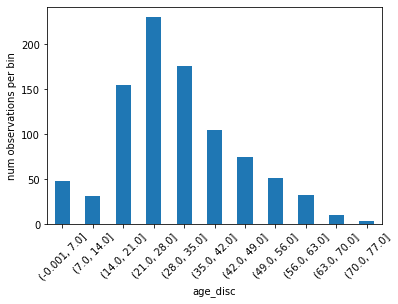

In [27]:
X_train.groupby('age_disc')['age'].count().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('num observations per bin')